In [1]:
import torch
import random

import sys
sys.path.append("../../../lib")
import utility

In [2]:
res_gpt2_xl = torch.load("../../data/gpt-j/indirect_effect_1000_examples.pt")
res_gpt_j = torch.load("../../data/gpt2-xl/indirect_effect_1000_examples.pt")

In [5]:
res_gpt2_xl[0][1][0]

'The language used by William Fitzwilliam, 4th Earl Fitzwilliam is a very interesting example of the use of the English'

In [6]:
res_gpt_j[0][1][0]

'The language used by Claude Henri de Rouvroy, comte de Saint-Simon is a good example of the way in which the French'

In [7]:
group_examples = []
for i in range(len(res_gpt_j)):
    text_gpt_j = res_gpt_j[i][1][0]
    for j in range(len(res_gpt2_xl)):
        text_gpt_xl = res_gpt2_xl[j][1][0]
        if text_gpt_j == text_gpt_xl:
            group_examples.append((res_gpt_j[i], res_gpt2_xl[j]))

In [10]:
len(group_examples)
ten_examples = random.sample(group_examples, 10)

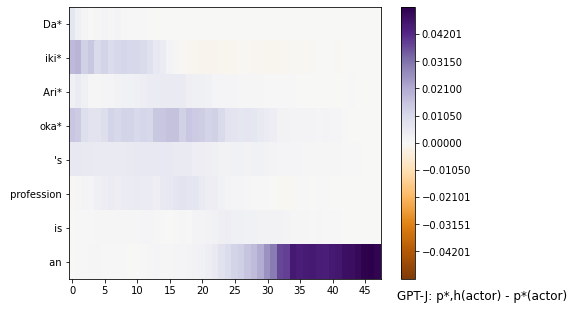

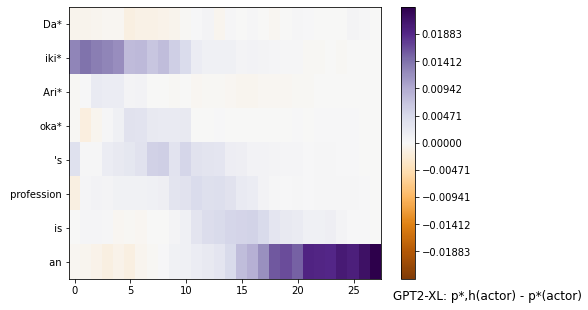

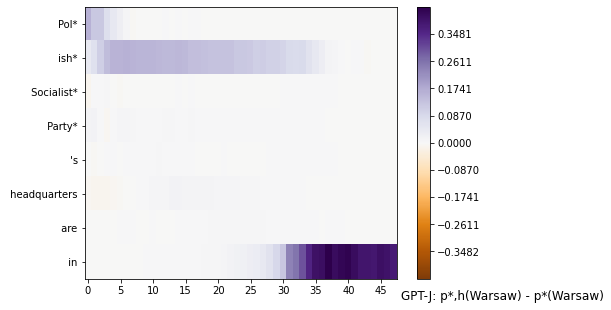

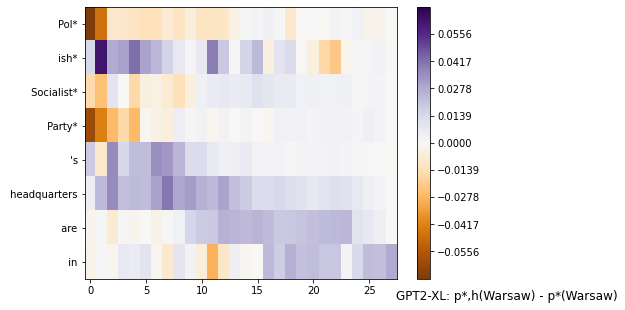

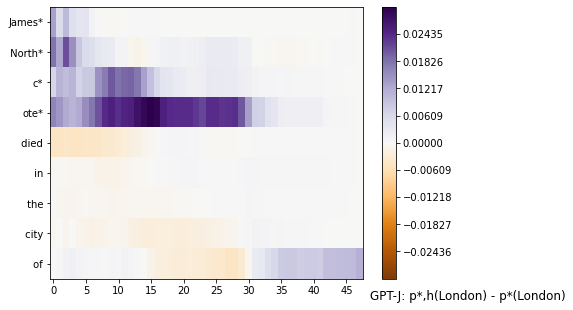

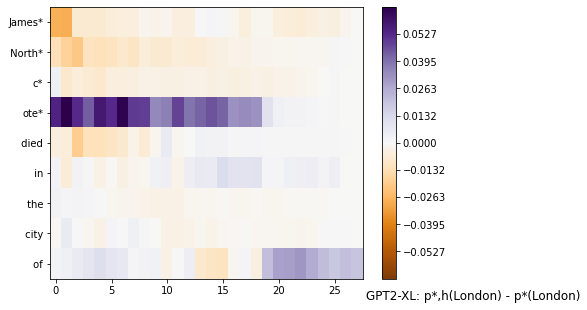

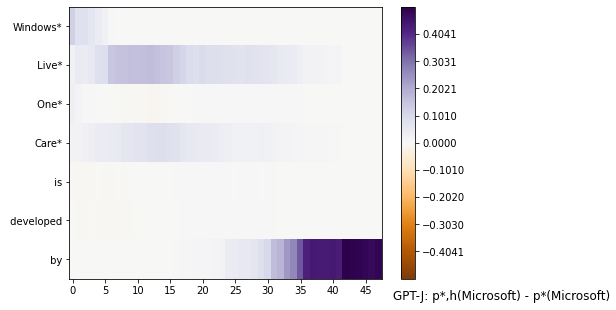

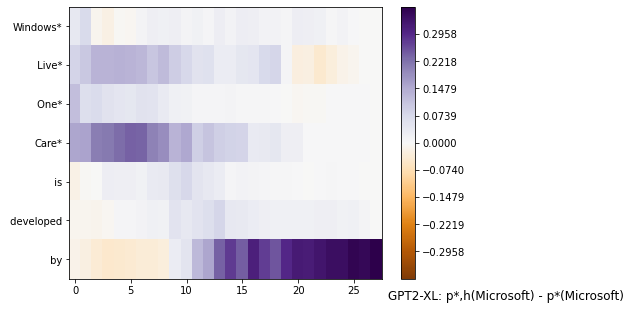

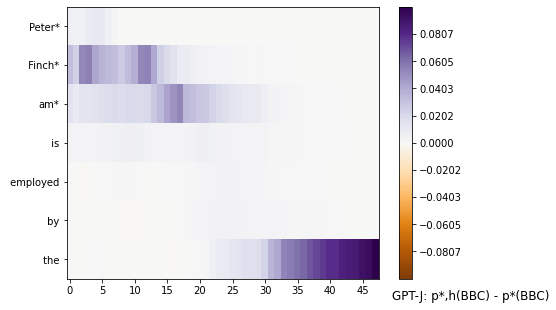

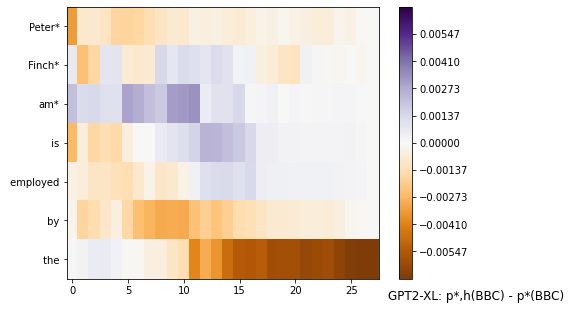

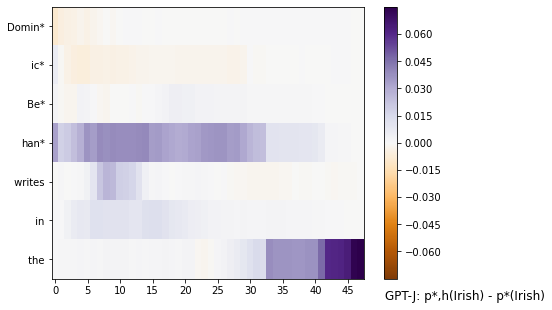

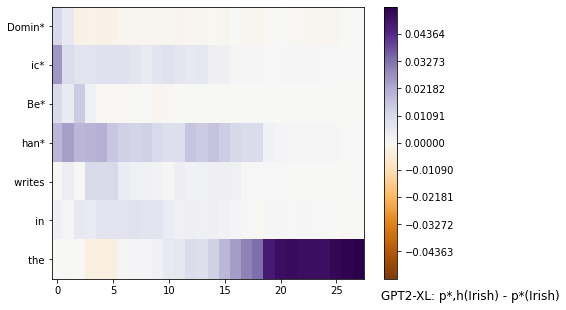

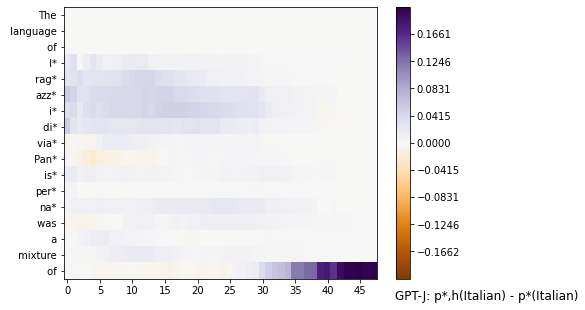

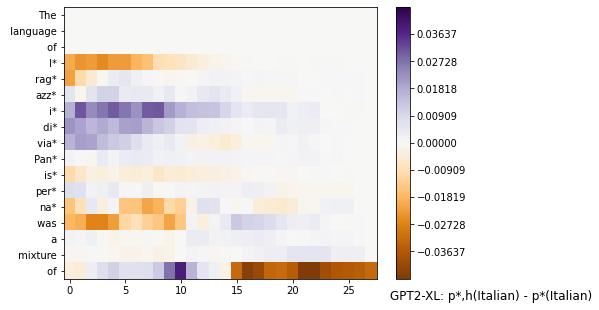

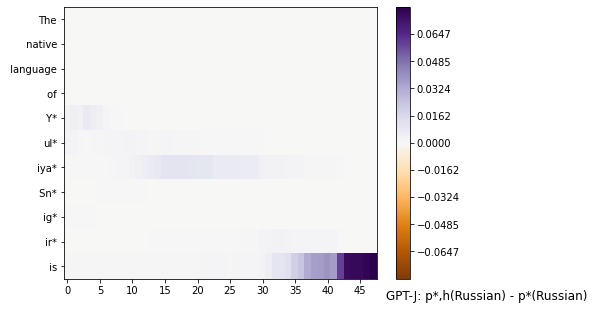

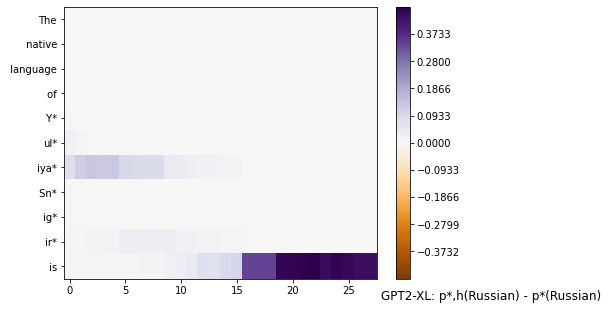

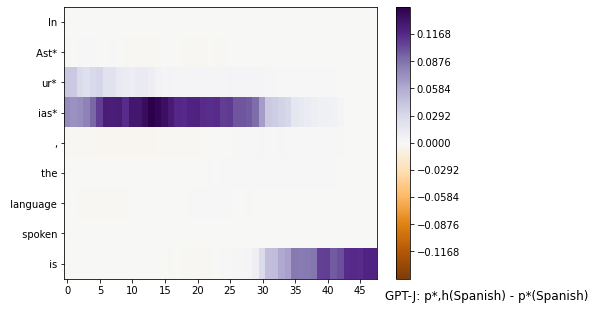

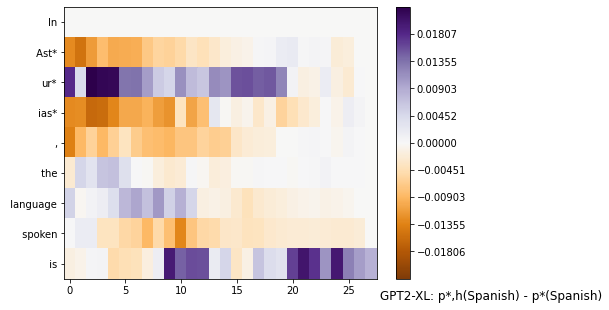

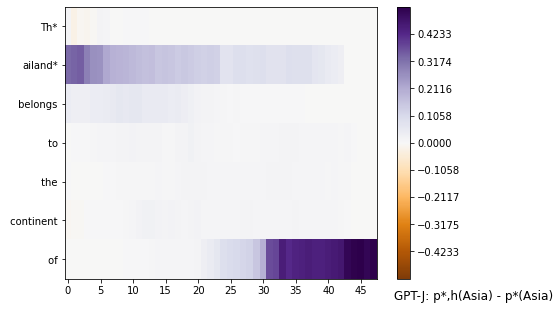

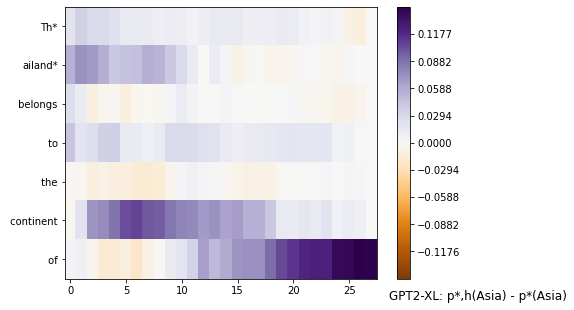

In [12]:
for i in range(10):
    prob, access = ten_examples[i][0]
    text, tkens, num_layers, _, _ = access
    x = num_layers
    y = tkens
    bound = max(torch.max(prob).item(), abs(torch.min(prob).item()))
    incr = bound / 10000
    token = text.split()[-1]
    title = f"GPT-J: p*,h({token}) - p*({token})"
    color_schema = "PuOr"
    
    utility.plot_results(prob, x, y, -bound, bound, incr, title, color_schema)
    
    prob, access = ten_examples[i][1]
    text, tkens, num_layers, _, _ = access
    x = num_layers
    y = tkens
    bound = max(torch.max(prob).item(), abs(torch.min(prob).item()))
    incr = bound / 10000
    token = text.split()[-1]
    title = f"GPT2-XL: p*,h({token}) - p*({token})"
    color_schema = "PuOr"
    
    utility.plot_results(prob, x, y, -bound, bound, incr, title, color_schema)